In [610]:
import numpy as np
import pandas as pd
import sys
SIZE = 183

### Reading fs_183_6 Matrix

In [611]:
df = pd.read_table('fs_183_6.mtx')
df.values[1:]

array([['1 1  1.8470335834570e-01'],
       ['2 1 -3.7192762029580e-07'],
       ['20 1 -4.4616731475320e-09'],
       ...,
       ['182 182  2.2361846869070e+03'],
       ['118 183 -2.2359999999970e+03'],
       ['183 183  2.2361846869070e+03']], dtype=object)

In [612]:
a = np.zeros((SIZE,SIZE))
a

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [613]:
c = np.array(df.values[1:])
for j in range(c.shape[0]):
    for i in c[j]:
        k = i.strip().split()
        a[int(k[0])-1][int(k[1])-1] = float(k[2])

In [614]:
a = a.transpose()
n = a.shape[0]

### Matrix Conditions:

In [615]:
tr = [1,2,3]
tr[0:0]

[]

In [616]:
a_norm = np.linalg.norm(a,ord=2)
a_cond = a_norm/np.linalg.norm(a,ord=-2)
print("norm(A): ",a_norm)
print("condition_No(A): ",a_cond)
print("float_pt_precision: ",np.finfo(float).eps)

norm(A):  1180838892.1872454
condition_No(A):  173678181547.5921
float_pt_precision:  2.220446049250313e-16


### Initalising Values

In [617]:
qt = np.zeros((n,n)) ## Q - orthogonal matrix is initialised as zero matrix
y =[] ## list of loss of orthogonality in CGS

## Classical Graham Schmidt Algorithm

In [618]:
for i in range(0,n):
    w = a[i]
    for j in range(0,i):
        w = w - np.dot(np.dot(a[i],qt[j]),qt[j])
    qt[i] = w/(np.linalg.norm(w,ord=2))
    I = np.identity(i+1)
    Qj = qt[0:i+1]
    r = np.dot(Qj,np.transpose(Qj)) ## calculating transpose(Q).Q at each iteration i
    y.append(np.linalg.norm(I-r)) ## calculating loss of orthogonality at each iteration i

In [619]:
y ## printing value of L.O for CGS

[2.220446049250313e-16,
 4.965068306497756e-16,
 5.438959822045004e-16,
 5.438959822045004e-16,
 5.438959822045003e-16,
 5.438959822045004e-16,
 5.438959822045003e-16,
 5.551115123128653e-16,
 5.551115123128653e-16,
 5.661048867006491e-16,
 5.661048867006491e-16,
 6.080941944490738e-16,
 6.473657049141398e-16,
 6.473657049141399e-16,
 6.568167990719022e-16,
 6.661338147753331e-16,
 7.021666937155671e-16,
 7.021666937155671e-16,
 7.021666937155671e-16,
 7.021666937155672e-16,
 7.108895957935588e-16,
 7.44760245974396e-16,
 7.44760245974396e-16,
 7.44760245974396e-16,
 7.44760245974396e-16,
 7.44760245974396e-16,
 7.447602459743961e-16,
 7.447602459743961e-16,
 7.44760245974396e-16,
 7.44760245974396e-16,
 7.44760245974396e-16,
 7.771561172378148e-16,
 7.771561172378148e-16,
 7.771561172378148e-16,
 7.771561172378149e-16,
 7.771561172378148e-16,
 7.771561172378148e-16,
 8.082545620882503e-16,
 8.382000022147355e-16,
 8.382000022147355e-16,
 8.671119018264574e-16,
 8.75927739287079e-16,
 

In [620]:
#Printing Orthogonalized matrix Q
q = np.transpose(qt)
q

array([[ 1.00000000e+00,  2.01364840e-06,  1.14050301e-14, ...,
        -2.06792834e-11,  1.08510644e-09,  2.41916394e-11],
       [-2.01364839e-06,  1.00000000e+00, -4.02616587e-15, ...,
        -2.07791597e-09, -1.19470304e-09, -1.09481576e-10],
       [ 0.00000000e+00,  0.00000000e+00,  9.99999994e-01, ...,
        -1.08644872e-10, -6.24657158e-11, -5.72429767e-12],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         8.66213925e-01,  4.98049493e-01,  1.84420548e-04],
       [-3.89899520e-09, -7.85120543e-15, -4.44681577e-23, ...,
        -4.07967409e-01,  7.09541941e-01,  2.62733286e-04],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -6.38927168e-05, -4.07021603e-04,  9.99998241e-01]])

## Modified Graham Schmidt Algorithm 

In [621]:
qt = np.zeros((n,n))
z = [] ## list of loss of orthogonality in MCGS/

In [622]:
for i in range(0,n):
    w = a[i]
    for j in range(0,i):
        proj = np.dot(w,qt[j]) ## In MCGS a[i] is replaced with w
        w = w - proj*(qt[j])
    qt[i] = w/(np.linalg.norm(w))
    I = np.identity(i+1)
    r = np.dot(qt[0:i+1],np.transpose(qt[0:i+1]))
    z.append(np.linalg.norm(I-r))  ## Loss of orthogonality at each iteration i

In [623]:
z

[2.220446049250313e-16,
 4.965068306497756e-16,
 5.438959822045004e-16,
 5.438959822045004e-16,
 5.438959822045003e-16,
 5.438959822045004e-16,
 5.438959822045003e-16,
 5.551115123128653e-16,
 5.551115123128653e-16,
 5.661048867006491e-16,
 5.661048867006491e-16,
 6.080941944490738e-16,
 6.473657049141398e-16,
 6.473657049141399e-16,
 6.568167990719022e-16,
 6.661338147753331e-16,
 7.021666937155671e-16,
 7.021666937155671e-16,
 7.021666937155671e-16,
 7.021666937155672e-16,
 7.108895957935588e-16,
 7.44760245974396e-16,
 7.44760245974396e-16,
 7.44760245974396e-16,
 7.44760245974396e-16,
 7.44760245974396e-16,
 7.447602459743961e-16,
 7.447602459743961e-16,
 7.44760245974396e-16,
 7.44760245974396e-16,
 7.44760245974396e-16,
 7.771561172378148e-16,
 7.771561172378148e-16,
 7.771561172378148e-16,
 7.771561172378149e-16,
 7.771561172378148e-16,
 7.771561172378148e-16,
 8.082545620882503e-16,
 8.382000022147355e-16,
 8.382000022147355e-16,
 8.671119018264574e-16,
 8.770534855612583e-16,


In [624]:
#Printing Orthogonalized matrix Q
q = np.transpose(qt)
q

array([[ 1.00000000e+00,  2.01364840e-06,  1.14050301e-14, ...,
        -2.06792834e-11,  1.08510644e-09,  2.41916394e-11],
       [-2.01364839e-06,  1.00000000e+00, -4.02616587e-15, ...,
        -2.07791606e-09, -1.19470336e-09, -1.09481580e-10],
       [ 0.00000000e+00,  0.00000000e+00,  9.99999994e-01, ...,
        -1.08644872e-10, -6.24657158e-11, -5.72429767e-12],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         8.66213925e-01,  4.98049493e-01,  1.84420548e-04],
       [-3.89899520e-09, -7.85120543e-15, -4.44681577e-23, ...,
        -4.07967409e-01,  7.09541941e-01,  2.62733286e-04],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -6.38927168e-05, -4.07021603e-04,  9.99998241e-01]])

## Classic CGS with Reorthogonalization

In [625]:
qt = np.zeros((n,n))
w = np.zeros((3,183))
u = [] ## list of loss of orthogonality in CGS with Reortho

In [626]:
for j in range(0,n):
    w[0] = a[j]
    for i in range(1,3):
        w[i] = w[i-1]
        for k in range(0,j):
            w[i] = w[i]-np.dot(np.dot(w[i-1],qt[k]),qt[k])
    qt[j] =w[i]/np.linalg.norm(w[i],ord=2)
    I = np.identity(j+1)
    r = np.dot(qt[0:j+1],np.transpose(qt[0:j+1]))
    u.append(np.linalg.norm(I-r))  ## Loss of orthogonality at each iteration i

In [627]:
u

[2.220446049250313e-16,
 4.965068306497756e-16,
 5.438959822045004e-16,
 5.438959822045004e-16,
 5.438959822045003e-16,
 5.438959822045004e-16,
 5.438959822045003e-16,
 5.551115123128653e-16,
 5.551115123128653e-16,
 5.661048867006491e-16,
 5.661048867006491e-16,
 6.080941944490738e-16,
 6.473657049141398e-16,
 6.473657049141399e-16,
 6.568167990719022e-16,
 6.661338147753331e-16,
 7.021666937155671e-16,
 7.021666937155671e-16,
 7.021666937155671e-16,
 7.021666937155672e-16,
 7.108895957935588e-16,
 7.447602459743959e-16,
 7.447602459743959e-16,
 7.447602459743959e-16,
 7.447602459743959e-16,
 7.447602459743959e-16,
 7.44760245974396e-16,
 7.44760245974396e-16,
 7.44760245974396e-16,
 7.447602459743959e-16,
 7.44760245974396e-16,
 7.771561172378147e-16,
 7.771561172378148e-16,
 7.771561172378148e-16,
 7.771561172378148e-16,
 7.771561172378147e-16,
 7.771561172378148e-16,
 8.082545620882502e-16,
 8.382000022147355e-16,
 8.382000022147354e-16,
 8.671119018264573e-16,
 8.741904837809515e-

In [628]:
#Printing Orthogonalized matrix Q
q = np.transpose(qt)
q

array([[ 1.00000000e+00,  2.01364840e-06,  1.14050301e-14, ...,
        -2.06789756e-11,  1.08510756e-09,  2.41918078e-11],
       [-2.01364839e-06,  1.00000000e+00, -4.02616587e-15, ...,
        -2.07791617e-09, -1.19470387e-09, -1.09481546e-10],
       [ 0.00000000e+00,  0.00000000e+00,  9.99999994e-01, ...,
        -1.08644874e-10, -6.24657272e-11, -5.72429777e-12],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         8.66213925e-01,  4.98049493e-01,  1.84420548e-04],
       [-3.89899520e-09, -7.85120543e-15, -4.44681577e-23, ...,
        -4.07967409e-01,  7.09541941e-01,  2.62733286e-04],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -6.38927168e-05, -4.07021603e-04,  9.99998241e-01]])

## MCGS with Reorthogonalization

In [629]:
qt = np.zeros((n,n))
w = np.zeros((3,183))
v = [] ## list of loss of orthogonality in CGS with Reortho

In [630]:
for j in range(0,n):
    w[0] = a[j]
    for i in range(1,3):
        w[i] = w[i-1]
        for k in range(0,j):
            w[i] = w[i]-np.dot(np.dot(w[i],qt[k]),qt[k])
    qt[j] =w[i]/np.linalg.norm(w[i],ord=2)
    I = np.identity(j+1)
    r = np.dot(qt[0:j+1],np.transpose(qt[0:j+1]))
    v.append(np.linalg.norm(I-r))  ## Loss of orthogonality at each iteration i

In [631]:
v

[2.220446049250313e-16,
 4.965068306497756e-16,
 5.438959822045004e-16,
 5.438959822045004e-16,
 5.438959822045003e-16,
 5.438959822045004e-16,
 5.438959822045003e-16,
 5.551115123128653e-16,
 5.551115123128653e-16,
 5.661048867006491e-16,
 5.661048867006491e-16,
 6.080941944490738e-16,
 6.473657049141398e-16,
 6.473657049141399e-16,
 6.568167990719022e-16,
 6.661338147753331e-16,
 7.021666937155671e-16,
 7.021666937155671e-16,
 7.021666937155671e-16,
 7.021666937155672e-16,
 7.108895957935588e-16,
 7.447602459743959e-16,
 7.447602459743959e-16,
 7.447602459743959e-16,
 7.447602459743959e-16,
 7.447602459743959e-16,
 7.44760245974396e-16,
 7.44760245974396e-16,
 7.44760245974396e-16,
 7.447602459743959e-16,
 7.44760245974396e-16,
 7.771561172378147e-16,
 7.771561172378148e-16,
 7.771561172378148e-16,
 7.771561172378148e-16,
 7.771561172378147e-16,
 7.771561172378148e-16,
 8.082545620882502e-16,
 8.382000022147355e-16,
 8.382000022147354e-16,
 8.671119018264573e-16,
 8.741904837809515e-

In [632]:
#Printing Orthogonalized matrix Q
q = np.transpose(qt)
q

array([[ 1.00000000e+00,  2.01364840e-06,  1.14050301e-14, ...,
        -2.06789756e-11,  1.08510756e-09,  2.41918078e-11],
       [-2.01364839e-06,  1.00000000e+00, -4.02616587e-15, ...,
        -2.07791617e-09, -1.19470387e-09, -1.09481546e-10],
       [ 0.00000000e+00,  0.00000000e+00,  9.99999994e-01, ...,
        -1.08644874e-10, -6.24657272e-11, -5.72429777e-12],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         8.66213925e-01,  4.98049493e-01,  1.84420548e-04],
       [-3.89899520e-09, -7.85120543e-15, -4.44681577e-23, ...,
        -4.07967409e-01,  7.09541941e-01,  2.62733286e-04],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -6.38927168e-05, -4.07021603e-04,  9.99998241e-01]])

### Setting x-axis values

In [633]:
x = np.arange(1,184)

## Ploting Loss of Orthogonality

<function matplotlib.pyplot.show(*args, **kw)>

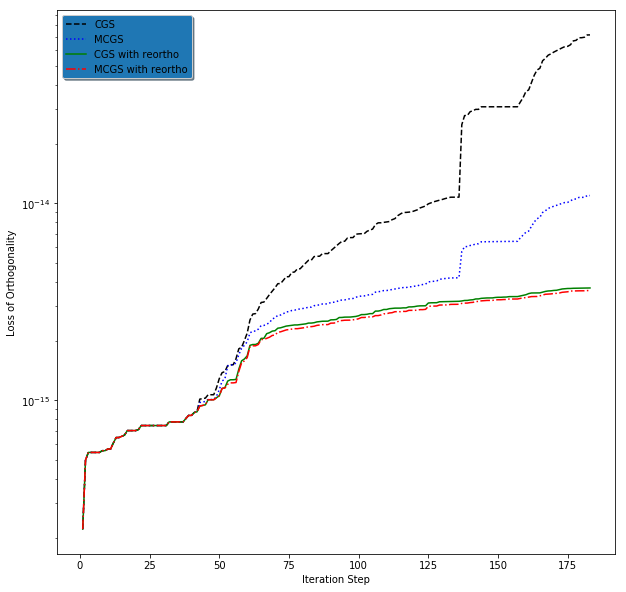

In [634]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.yscale('log') ## y is scaled to log axis for visualization
plt.plot(x,y,'k--',label = 'CGS') ## CGS
plt.plot(x,z,'b:',label = 'MCGS') ## MGS
plt.plot(x,u,'g-',label = 'CGS with reortho') ##CGS with reortho
plt.plot(x,v,'r-.',label = 'MCGS with reortho') ## MCGS with reortho
plt.ylabel('Loss of Orthogonality')
plt.xlabel('Iteration Step')
legend = plt.legend(loc='upper left', shadow=True)
legend.get_frame().set_facecolor('C0')
plt.show

#### The loss of orthogonality in the QR factorization for different Gram-Schmidt orthogonalization variants: 
    CGS algorithm (dashed line) (black)
    MGS algorithm (dotted line) (blue)
    CGS algorithm with reorthogonalization (solid line) (green)
    MGS algorithm with reorthogonalization (dotted-solid line) (red)